# Measurement of Coefficient of Drag

## Description of Data
I have a file `freefall.mp4` containing a high frame rate video of a pickleball falling.
Behind it there is a 2x8 foot peg board to assist in measuring the ball location.

My goal is to determine, empirically, a coefficient of drag for a pickleball. At the moment, I have only one
video of it. The ball is dropped in front of a 2 foot by 8 foot peg board. I would like to use python
to calculate the locations of the ball from the video. Ideally, a first step might be to trim the video to
a narrower "window" just to reduce the amount of image data that is not relevant.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

What a fun project! Measuring drag coefficients empirically from video is a classic physics experiment, and Python is a great tool for this.

Before we dive into trimming the video, let me ask a couple of quick questions:

1. **Your Python comfort level**: Are you familiar with libraries like `opencv` (cv2) for video processing, or would this be new territory?

2. **The video itself**: Do you know the frame rate of your video? (This will be important later for calculating velocities.)

3. **Trimming approach**: When you say "narrower window," are you thinking of:
   - Cropping spatially (cutting out the left/right sides to focus on the pegboard region), or
   - Trimming temporally (cutting frames before/after the ball is in view), or
   - Both?

Once I know a bit more about where you're starting from, we can figure out the best first step together!

My goal is to measure the vertical location of a ball in each frame of a video. There is only 
one ball involved. Behind the ball is a 2 foot by 8 foot peg board to help calibrate our measurement.
An initial goal will be to find the ball and trim the width of the video to reduce the amount
of video processing. So we might start by viewing the first frame to determine the width of
the frame of interest. The video is in `.mp4` format.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! Let's start by loading the video and viewing the first frame so you can see what you're working with and decide where to trim.

Since you're working with `.mp4` video, you'll need `opencv` (cv2). Do you already have it installed, or would you like to install it first with `!pip install opencv-python`?

Once we have that ready, we can write a couple of lines to:
1. Open the video file
2. Read and display the first frame

Would you like me to show you those lines, or would you prefer to try writing them yourself first?

Yes. I have some familiarity with cv2. That seems like the best tool for this. Yes, cropping left and right. I believe the frame rate is 180 fps.
I think that may be available in the mp4 metadata. You are right. Our first goal is to just create a file for numerical analysis.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Perfect! With 180 fps, you'll have excellent temporal resolution for tracking the ball's motion.

Let's start simple. Try opening the video and displaying the first frame so you can see the full view and decide where to crop:

```python
import cv2
import matplotlib.pyplot as plt

cap = cv2.VideoCapture('freefall.mp4')
ret, frame = cap.read()
```

Then display it with matplotlib so you can see the pixel coordinates. Since cv2 reads in BGR format, you'll want to convert to RGB for proper color display.

Can you give that a try and show the frame? Once you see it, you can identify the left and right x-coordinates where you want to crop.

We will need to advance some number of frames before the ball is visible.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good observation! The ball isn't visible in the first frame yet. Let's advance through frames until you can see it.

You can loop through frames and display them. Try something like:

```python
for i in range(50):  # advance 50 frames
    ret, frame = cap.read()
```

Then display that frame to see if the ball is visible. You might need to adjust the number depending on when the ball enters the frame.

Want to try advancing some frames and checking?

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def get_video_parameters(cap):
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    return fps, width, height, frame_count

In [ ]:
def view_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 12))
    plt.imshow(frame_rgb)
    plt.gca().xaxis.set_ticks_position('both')
    plt.tick_params(top=True, labeltop=True)
    plt.show()

In [ ]:
def get_frame(cap, n):
    """cap must be at the start of the video"""
    for i in range(n):  # advance 50 frames
        ret, frame = cap.read()
    return ret, frame

In [ ]:
cap = cv2.VideoCapture('../data/freefall.mp4')

In [ ]:
fps, width, height, frame_count = get_video_parameters(cap)
fps, width, height, frame_count

(54.7087743509494, 2160, 3840, 74)

It seems like maybe I need to "close" the capture 

In [ ]:
n = 11
ret, frame = get_frame(cap, n)

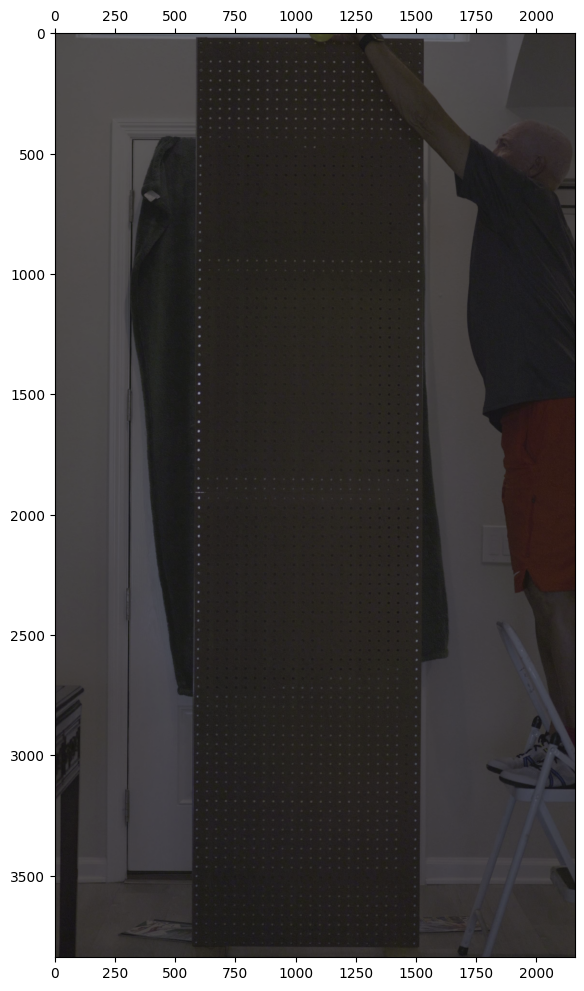

In [ ]:
view_frame(frame)

In [ ]:
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count - 1)
ret, last_frame = cap.read()

In [ ]:
n = 11
cap.set(cv2.CAP_PROP_POS_FRAMES, n)
ret, frame_n = cap.read()

In [ ]:
view_frame(frame_n)

In [ ]:
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count - 1)
ret, last_frame = cap.read()

In [ ]:
n = 12
cap = cv2.VideoCapture('freefall.mp4')
for i in range(12):  # advance 50 frames
    ret, frame = cap.read()
view_frame(frame)

I don't understand what might have gone wrong there.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

It looks like you've created a nice `view_frame()` function! That's great for displaying frames with coordinate information.

What issue are you encountering? Did you try to view a frame and something didn't work as expected, or are you getting an error message?

If you haven't tried viewing a frame yet, you could test your function by opening the video, advancing some frames, and then calling `view_frame(frame)`. What's happening when you run your code?

My note ended up in the cell that walks through the frames. At the end, it call view_frame and there was an error.
please repeat the section of code that opens the video and loops through the frames.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Here's the code to open the video and loop through frames:

```python
cap = cv2.VideoCapture('freefall.mp4')
for i in range(50):  # advance 50 frames
    ret, frame = cap.read()
view_frame(frame)
```

This will advance 50 frames and then display the last one. Does that work, or are you still getting an error?

In [ ]:
cap = cv2.VideoCapture('freefall.mp4')
for i in range(50):  # advance 50 frames
    ret, frame = cap.read()
view_frame(frame)

In [ ]:
def view_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 12))
    plt.imshow(frame_rgb)
    plt.gca().xaxis.set_ticks_position('both')
    plt.tick_params(top=True, labeltop=True)
    plt.show()


It seems like the bottom of the ball first becomes visible in frame 12. Can we get the metadata from the video.
We will need the dimensions of the image for cropping.

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Great! You can get the video metadata using `cap.get()` with various property codes. Try this:

```python
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
```

This will give you the frame rate, dimensions, and total number of frames. Once you have the width and height, you can decide on your crop boundaries (left and right x-coordinates).

What x-coordinates look good for cropping based on the frame you're seeing?

In [ ]:
fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

In [ ]:
fps, width, height, frame_count

(0.0, 0, 0, 0)

Excellent! I can now identify, a good value for the right side. Unfortunately, the camera may not be level
and I think the board may not be perfectly vertical. I will want to capture a frame near the end.
Can we go to the end and read backward, or do we need to work our way to the bottom using the
existing loop, with a higher "range"?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Good question! With cv2, you can jump to specific frames using `cap.set()`. Try:

```python
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count - 1)
ret, last_frame = cap.read()
```

This will jump directly to the last frame without having to loop through all the frames in between. Much faster!

Want to give that a try and display the last frame to see where the ball ends up?

In [ ]:
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_count - 1)
ret, last_frame = cap.read()